Number of datapoints: 2240
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPur

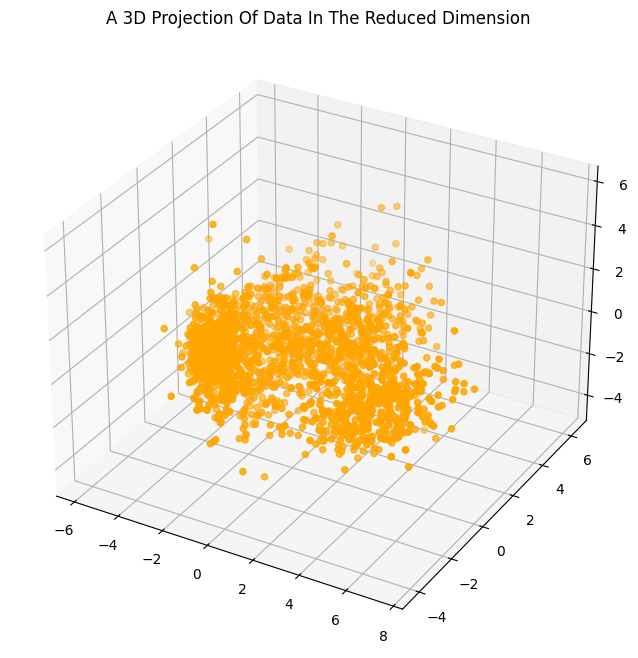

,col1,col2,col3
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,-1.859724e-16,-5.130272e-17,6.412841e-18
std,2.849186e+00,1.708098e+00,1.247496e+00
min,-5.856194e+00,-4.237877e+00,-4.471938e+00
25%,-2.499244e+00,-1.317873e+00,-8.235671e-01
50%,-7.804942e-01,-1.610019e-01,1.037972e-02
75%,2.402501e+00,1.233876e+00,8.409039e-01
max,7.412840e+00,6.310777e+00,5.937088e+00


In [2]:
%run data-processing.ipynb

# Clustering
Agglomerative clustering is performed on the data. Agglomerative clustering is an unsupervised machine learning technique that merges similar "Clusters" of data (each data point is considered its own "cluster" initially), until there are the target number of clusters left.

## 1. Determine number of clusters
The "Elbow method" is used to determine the number of clusters to form. This involves plotting the inertia (within-cluster sum of squares) against the number of clusters, and identifying when the inertia visibly starts decreasing as a lower rate (resembling the shape of an "elbow")

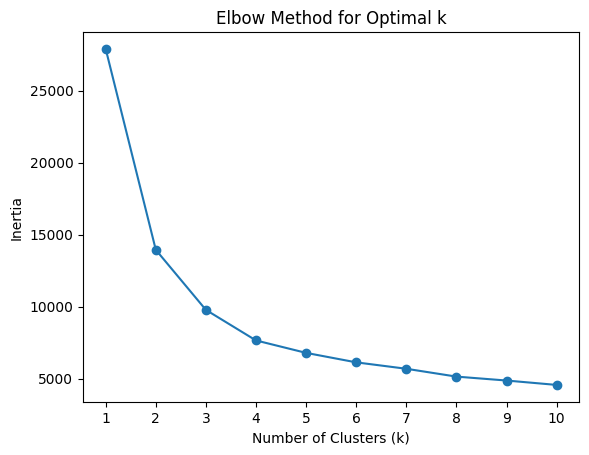

In [3]:
inertia_values = []
k_values = range(1, 11)  # Specify the range of k values to try

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(PCA_ds)  # Fit KMeans to the data
    inertia_values.append(kmeans.inertia_)  # Append the inertia value to the list

# Plotting the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.show()

From the above graph, we decide the number of clusters to be 4, as the intertia begins decreasing at a slower rate from that point onwards.

## 2. Fit data to clusters
The data is fitted using the Agglomerative Cluster model, with the number of clusters set as 4.

In [6]:
# Initiate agglomerative clustering object
AC = AgglomerativeClustering(n_clusters=4)
# Fit the model and predict clusters
AC_clusters = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = AC_clusters
data["Clusters"]= AC_clusters

## 3. Plot clusters
Data is plotted with 3-dimensional grid to visualise the distribution of clusters. Each color represesnts one "cluster"

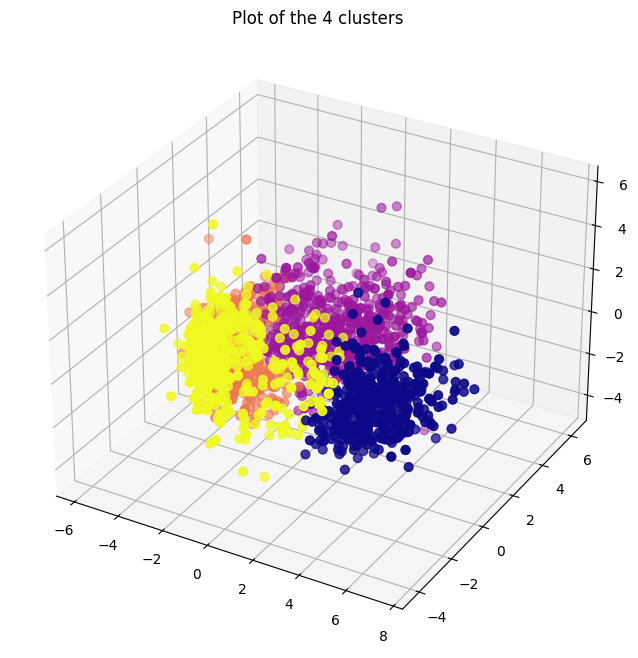

In [42]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = "plasma_r" )
ax.set_title("Plot of the 4 clusters")
plt.show()

# Cluster analysis

We then analyse the clusters to search for possible patterns through Exploratory Data analysis.


We plot a graph to see the number of entries for each of the clusters.

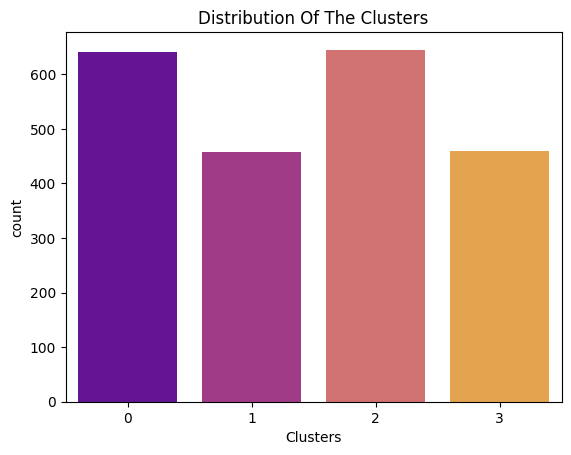

In [45]:
colors = sns.color_palette("plasma", n_colors=4)
pl = sns.countplot(x=data["Clusters"], palette=colors)
pl.set_title("Distribution Of The Clusters")
plt.show()


We then plot a graph to show 

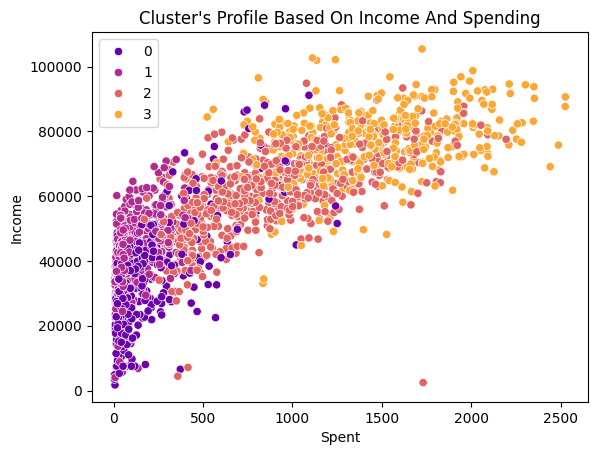

In [46]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= colors)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

As there appears to be some outliers in the set,  we remove the outliers and plot the graph of income again.

A swarm plot of clusters and their spending is also plotted.


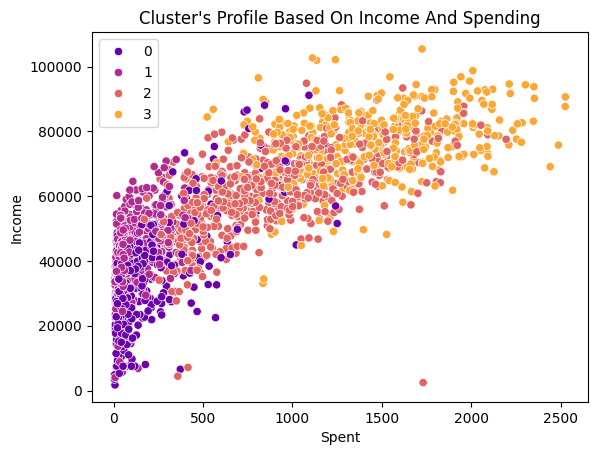

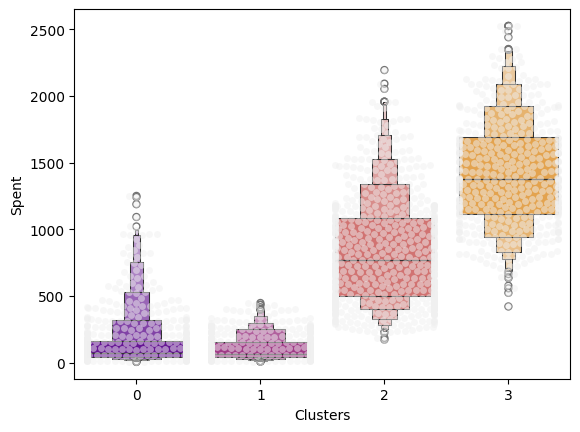

In [52]:
data = data[(data["Income"]<110000)]
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= colors)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

plt.figure()
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color = "#F0F0F0", alpha=0.5 )
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=colors)
plt.show()

#### From the above charts, it appears that cluster 3 is the cluster with the highest spenders, followed by cluster 2.